In [1]:
#note that this Agent class was taken from Phil Tabor.  Modified slightly.  All credit to Phil Tabor.
class Agent:
    def __init__(self, lr, gamma, n_actions, eps_start, eps_end, eps_dec):
        self.lr = lr
        self.gamma = gamma
        self.n_actions = n_actions
        self.epsilon = eps_start
        self.eps_min = eps_end
        self.eps_dec = eps_dec

        self.Q = {}  #initialize an empty dictionary to store the q values

        #greedy-epsilon
    def choose_actions(self, state):
        if np.random.rand() < self.epsilon:  #select random action if less than epsilon
            action = np.random.choice([i for i in range(self.n_actions)])
        else:
            actions = np.array([self.Q.get((state, a), 0.0) for a in range(self.n_actions)])
            action = np.argmax(actions)   #select action that gives max q value
        return action

    def learn(self, state, action, reward, next_state):
        #select the max q value in the next state
        actions_next = np.array([self.Q.get((next_state, a), 0.0) for a in range(self.n_actions)])  #create np array
        a_max = np.argmax(actions_next)   # find the index of max q value

        # bellman update equation (updating the state, action pair in the q table)
        self.Q[(state, action)] = self.Q.get((state, action), 0.0) + self.lr * (
            reward + self.gamma * actions_next[a_max] - self.Q.get((state, action), 0.0)
        )

        self.decrement_epsilon()

    def decrement_epsilon(self):
        self.epsilon = self.epsilon * self.eps_dec if self.epsilon > self.eps_min else self.eps_min
        
    # after model has learned (i.e. q table converged), we can now feed in a state and the model will 
    # give us the optimal action.
    def final_model(self,state):
        actions = np.array([self.Q.get((state,a), 0.0) for a in range(self.n_actions)])
        action = np.argmax(actions)
        if action == 0:
            out = "up"
        elif action == 1:
            out = "down"
        elif action == 2:
            out = "left"
        else:
            out = "right"
        return out



In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt




class GridEnv(gym.Env):  
    # GridEnv inherits from the gym.Env class.  GridEnv is a subclass
    # By inheriting it follows the OpenAI Gym env interface that includes methods such as
    # reset, step, render which are commonly used in RL envs. 
    # By using this interface it allows instances of this GridEnv class to be used  with algos
    # and tools that are designed to work with the Gym env interface.
    
    def __init__(self, square_grid_size):
        super(GridEnv, self).__init__()

        # Initialize the state space
        self.size = square_grid_size
    
   
    def reset(self):
        # Reset the environment to the initial state (top-left corner) of the Agent
        self.state = (0, 0)  #row, column
        self.total_reward = 0

     

    def step(self, action):
        # Take an action and return the new state, reward, and whether the episode is done

        # Define possible actions: 0 - Up, 1 - Down, 2 - Left, 3 - Right
        if action == 0 and self.state[0] > 0:
            self.state = (self.state[0] - 1, self.state[1])
        elif action == 1 and self.state[0] < self.size:
            self.state = (self.state[0] + 1, self.state[1])
        elif action == 2 and self.state[1] > 0:
            self.state = (self.state[0], self.state[1] - 1)
        elif action == 3 and self.state[1] < self.size:
            self.state = (self.state[0], self.state[1] + 1)

       
    # rewards
        if self.state == (self.size, self.size):
            reward = 1000
        elif self.state== (self.size,0):
            reward = -1000
        else:
            reward = -1


        # Check if the episode is done (reached a terminal state)
        done = (self.state == (self.size, self.size)) or (self.state == (self.size, 0))

        return self.state, reward, done

    

    def render(self, trajectory=None):
        pass





#%%





## run the episodes

Text(0, 0.5, 'reward')

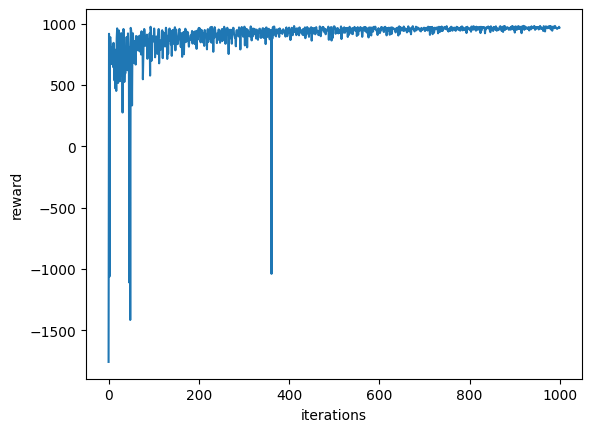

In [3]:
if __name__ == '__main__':
    env = GridEnv(square_grid_size=10)
    agent = Agent(gamma=0.995,lr = 0.01, n_actions =4,
              eps_dec=0.9, eps_end= 0.01, eps_start=1.0)
    scores = []
    n_eps = 1000
    win_pct_list = []
    trajectory = []
    
    
    for i in range(n_eps):
        done = False
        state = env.reset()
        score = 0
        
        while not done:
            action = agent.choose_actions(state)
            state_, reward, done = env.step(action)
            agent.learn(state, action, reward, state_)
            score += reward
            state = state_
            
     
        scores.append(score)
       
       
plt.plot(scores)     
plt.xlabel('iterations')
plt.ylabel('reward')
   
        

In [5]:
agent.final_model((5,5))

'down'